Hi Everyone! I'm trying to analyse customer behavior and sales forecast for Supermarket dataset.
Hope everyone enjoy with my analysis :) If you have any suggestion, please feel free to comment.

Let's start it!

# Data Overview

## Context
Supermarkets are a convenient and popular way to shop for groceries and other necessities. They offer a wide variety of products and services, and they are typically located in convenient locations. By understanding the different needs of their customers, supermarkets can better meet those needs and provide a better shopping experience.


## Table Information
We have 17 column in table which are :
1. Invoice id: Computer generated sales slip invoice identification number
2. Branch: Branch of supercenter (3 branches are available identified by A, B and C).
3. City: Location of supercenters
4. Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
5. Gender: Gender type of customer
6. Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
7. Unit price: Price of each product in $
8. Quantity: Number of products purchased by customer
9. Tax: 5% tax fee for customer buying
10. Total: Total price including tax
11. Date: Date of purchase (Record available from January 2019 to March 2019)
12. Time: Purchase time (10am to 9pm)
13. Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
14. COGS: Cost of goods sold
15. Gross margin percentage: Gross margin percentage
16. Gross income: Gross income
17. Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

In [ ]:
## Import data and library
library(readr)
library(tidyverse)
library(dplyr)
library(janitor)
supermarket <- read_csv("/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv")

In [ ]:
## Preview and cleaning data
head(supermarket)
df <- data.frame(supermarket)
df <- clean_names(supermarket)
colnames(df)

# Customer Behavior

By comprehending the distinct trends between the two genders and the top product lines on which they spend, we can create promotions that are tailored to their requirements. Furthermore, we can predict and stock goods with the items that customers desire and require, which can assist in lowering costs.

In [ ]:
## To find customer insigh and product trend line
## Top 10 popular product line
top_sales_mix <- df %>%
                        select(gender , product_line, total) %>% 
                        group_by(product_line) %>%
                        arrange(desc(total)) 
top_sales_female <- df %>%
                        select(gender , product_line, total) %>% 
                        filter(gender == 'Female') %>% 
                        group_by(product_line) %>%
                        arrange(desc(total)) %>% 
                        head(10)
top_sales_male <- df %>%
                      select(gender , product_line, total) %>% 
                      filter(gender == 'Male') %>% 
                      group_by(product_line) %>%
                      arrange(desc(total)) %>% 
                      head(10)

total_top_sales <- df %>%
                      group_by(product_line) %>%
                      summarise(total_sales = sum(total)) %>% 
                      arrange(desc(total_sales))
head(total_top_sales)

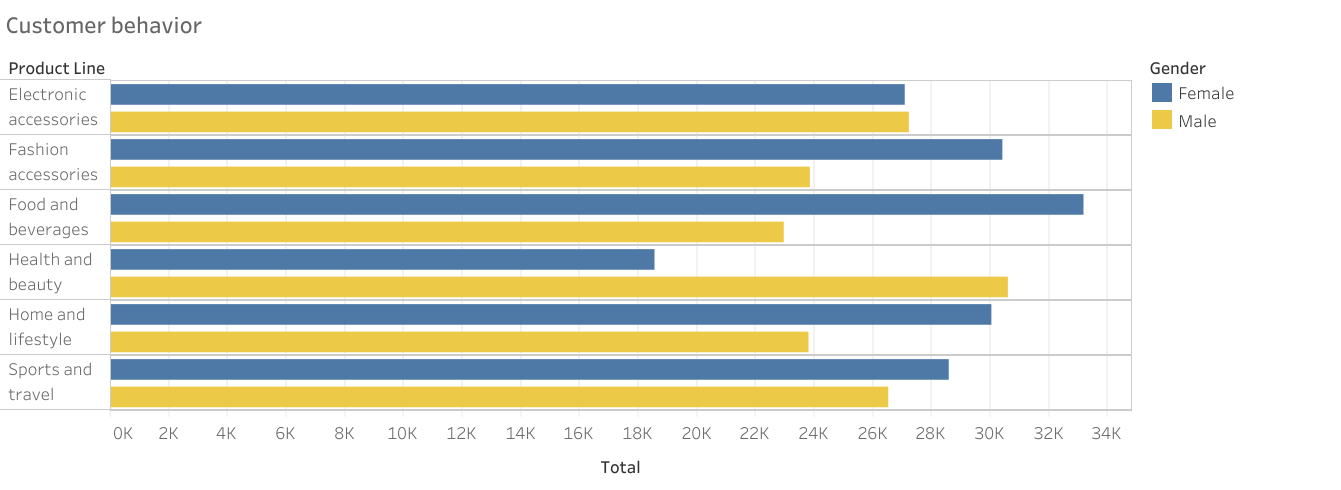

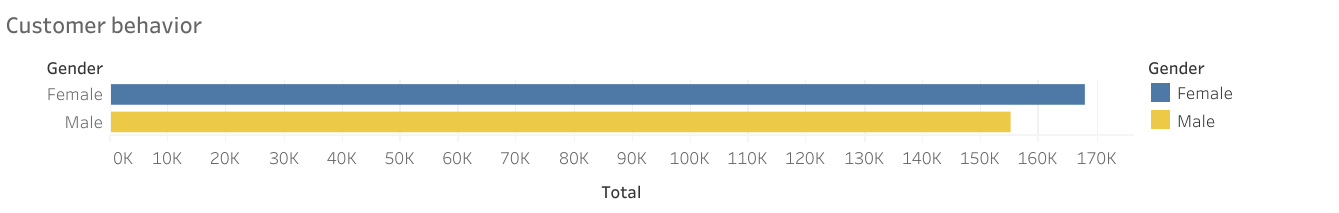

# Sales Forecast
Based on our analysis of historical sales data, we anticipate that next month's sales is close to last 3 month but decrease from last month.

In [ ]:
## Predict total sales on Apr 2019
# Monthly total sales
df2 <- df %>%
          separate(date, into = c("month", "day", "year"), sep = "/")
df2 %>% 
    group_by(month) %>% 
    summarise(total_sales = sum(total))

# Create model and prediction
sales_data <- data.frame(
  months <- as.Date(c("2019-01-01", "2019-02-01" ,"2019-03-01")),
  sales <- c(116292, 97219, 109456)
  )
model <- lm(sales ~ months, data = sales_data)
predict_month <- data.frame(months = as.Date("2019-04-01"))
predict_month$month <- as.Date(predict_month$month)
predict <- predict(model, newdata = predict_month)
print(predict)


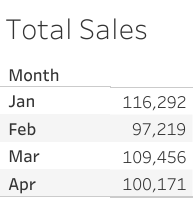

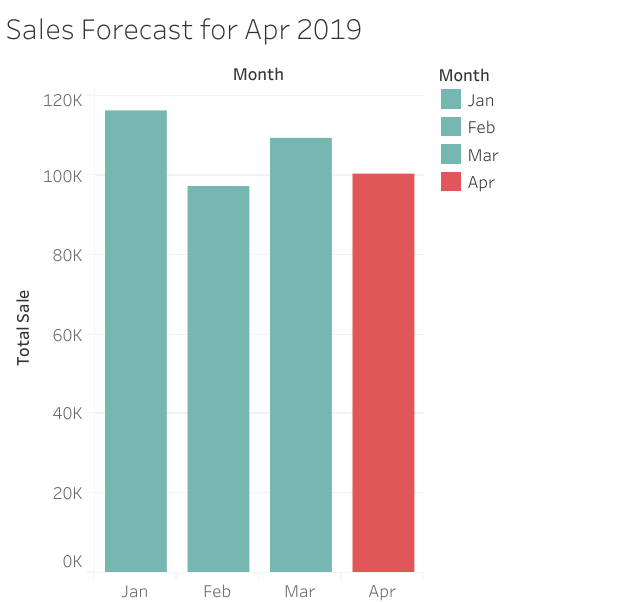

We estimated sales value for Apr 2019 for evaluate model and it difference with predicted model about 170.58

In [ ]:
# Evaluate the model performance
# Estimated sales value for Apr 2019
actual_sales <- c(100000)  
squar_error <- (actual_sales - predict) ^ 2
(rmse <- sqrt(mean(squar_error)))

# Relationship between gender and rating
Correlation between customer type and rating is about -0.019. It is close to zero so, we can indicate two variable are relationship.From the output normal give high rating more than member customer type and average rating for normal is 7.01 and member is 6.94.

This model shows customer satisfaction which we should improve and increase rating with our member for avoice customer churn.

In [ ]:
## Correlation between gender and rating
cus_type <- if_else(df$customer_type == "Member", 1, 0)
(correlation <- cor(cus_type, df$rating, method = "spearman"))

# Evaluate correlation
df %>% 
  group_by(customer_type) %>% 
  summarise(avg_rating = mean(rating)) 

# Summary
1. Customer behavior is show female spending more than male and different product line in both gender
2. Forecast total sales is close to last 3 month but decrease from last month
3. Rating and customer type are relationship (but it is not mean customer type cause to rating)


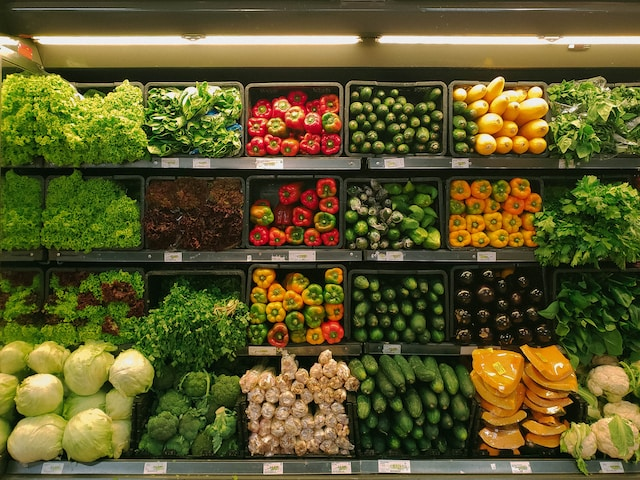